In [1]:
import numpy as np
import pandas as pd

# 1.Pandas中的运算
## 1.1 对象和数值之间的运算：逐元素的运算

In [2]:
s1 = pd.Series([1,2,3], index = list('abc'))

In [3]:
s1

a    1
b    2
c    3
dtype: int64

In [4]:
s1 + 3
# 针对Series的每个值进行对应的算术运算

a    4
b    5
c    6
dtype: int64

In [5]:
df1 = pd.DataFrame(
    np.random.randint(80, 200, (7,5)) / 10,
    index = pd.date_range('2022/11/20', periods = 7),
    columns = ['Apple', 'Facebook', 'Microsoft', 'Google', 'Intel']
)

In [6]:
df1

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,18.3,19.0,10.3,12.6,16.3
2022-11-21,16.3,16.5,15.7,15.1,16.5
2022-11-22,10.9,17.5,19.2,15.9,11.6
2022-11-23,19.5,15.4,15.5,11.6,10.1
2022-11-24,11.2,11.2,12.1,9.0,16.8
2022-11-25,12.3,14.9,9.2,10.7,14.5
2022-11-26,9.1,15.7,16.9,9.5,14.2


In [7]:
df1 * 2

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,36.6,38.0,20.6,25.2,32.6
2022-11-21,32.6,33.0,31.4,30.2,33.0
2022-11-22,21.8,35.0,38.4,31.8,23.2
2022-11-23,39.0,30.8,31.0,23.2,20.2
2022-11-24,22.4,22.4,24.2,18.0,33.6
2022-11-25,24.6,29.8,18.4,21.4,29.0
2022-11-26,18.2,31.4,33.8,19.0,28.4


## 1.2 对象之间的运算

    Series和Series之间
    Series和DataFrame之间
    DataFrame之间
    
    匹配的问题
    如何进行匹配？
    匹配不上如何处理？
    
### Series之间

    按照index进行匹配，匹配上的位置进行对位运算，匹配不上的位置引入nan

In [8]:
s1

a    1
b    2
c    3
dtype: int64

In [9]:
s2 = pd.Series([1,2,3,4], index = list('bcde'))

In [10]:
s2

b    1
c    2
d    3
e    4
dtype: int64

In [11]:
s1 + s2

a    NaN
b    3.0
c    5.0
d    NaN
e    NaN
dtype: float64

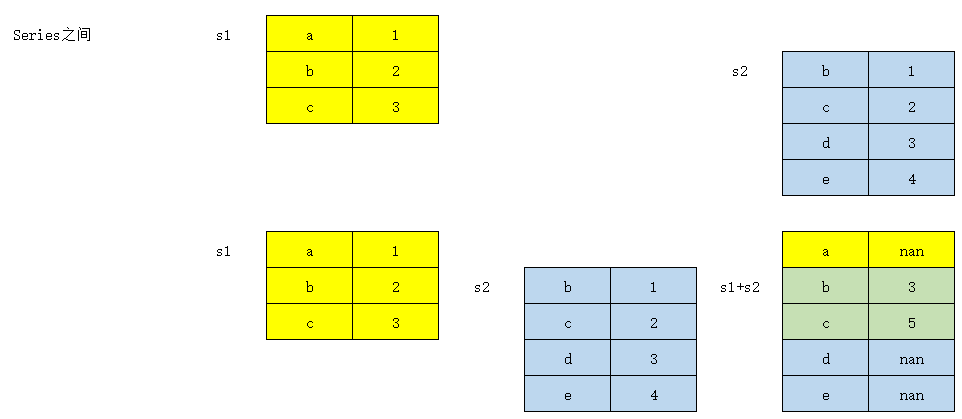

### Series和DataFrame之间

    用Series的index和DataFrame的columns进行匹配，匹配上的位置，对Series进行广播，并和DataFrame进行对位运算，匹配不上的位置，引入NaN

In [12]:
df2 = pd.DataFrame(
    np.arange(12).reshape((3,4)),
    index = list('ABC'),
    columns = list('abcd')
)

In [13]:
df2

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [14]:
s1

a    1
b    2
c    3
dtype: int64

In [15]:
df2 + s1

,a,b,c,d
A,1.0,3.0,5.0,NaN
B,5.0,7.0,9.0,NaN
C,9.0,11.0,13.0,NaN


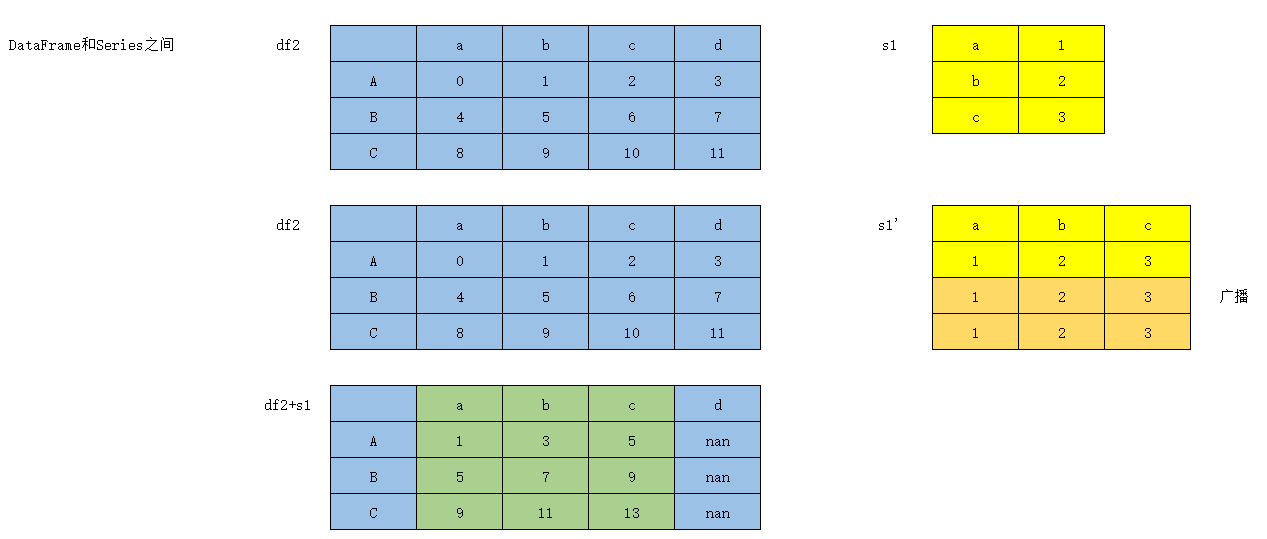

### DataFrame之间

    同时按照index和columns进行匹配，匹配上的位置进行对位运算，匹配不上的位置引入nan

In [16]:
df2

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [17]:
df3 = pd.DataFrame(
    np.arange(1,13).reshape((4,3)),
    index = list('BCDE'),
    columns = list('cde')
)

In [18]:
df3

,c,d,e
B,1,2,3
C,4,5,6
D,7,8,9
E,10,11,12


In [19]:
df2 + df3

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,7.0,9.0,NaN
C,NaN,NaN,14.0,16.0,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN


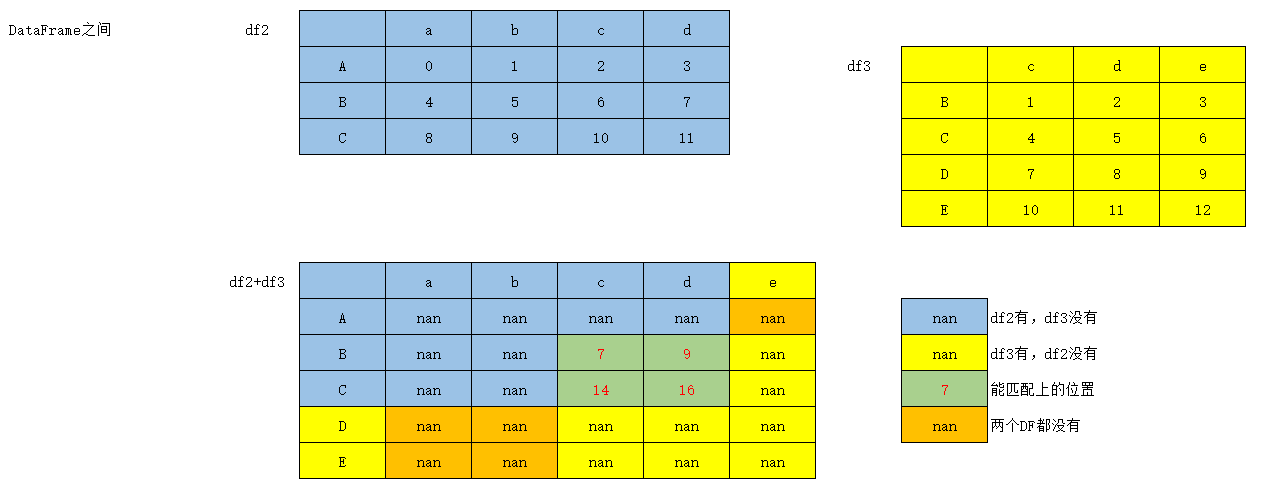

### 用方法进行运算

    Signature: pd.DataFrame.add(self, other, axis='columns', level=None, fill_value=None)
    Docstring:
    Get Addition of dataframe and other, element-wise (binary operator `add`).

    Equivalent to ``dataframe + other``, but with support to substitute a fill_value
    for missing data in one of the inputs. With reverse version, `radd`.

    Among flexible wrappers (`add`, `sub`, `mul`, `div`, `mod`, `pow`) to
    arithmetic operators: `+`, `-`, `*`, `/`, `//`, `%`, `**`.
    
    other : 另一个参与运算的对象
    fill_value : 填充缺失部分的值

In [20]:
df2.add(df3)

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,7.0,9.0,NaN
C,NaN,NaN,14.0,16.0,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN


In [21]:
df2 + df3

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,7.0,9.0,NaN
C,NaN,NaN,14.0,16.0,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN


In [22]:
df2.add(df3, fill_value = 0)

,a,b,c,d,e
A,0.0,1.0,2.0,3.0,NaN
B,4.0,5.0,7.0,9.0,3.0
C,8.0,9.0,14.0,16.0,6.0
D,NaN,NaN,7.0,8.0,9.0
E,NaN,NaN,10.0,11.0,12.0


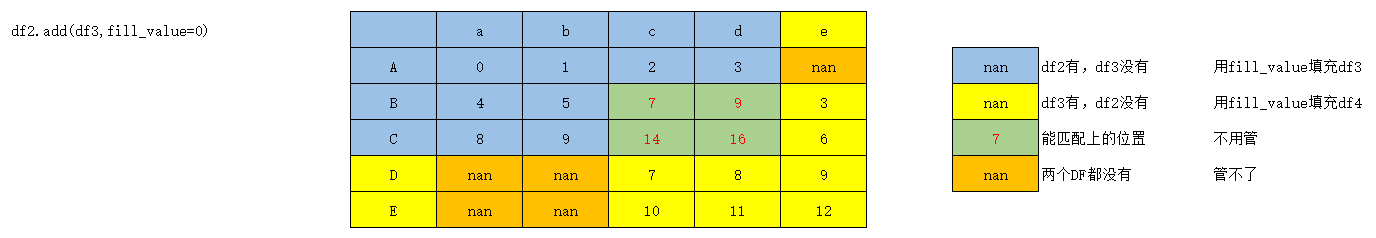
fill_value参数是针对一个数据集中有，另一个数据集中没有数据的位置，用fill_value的值填充没有数据的数据集，然后做对位的运算，如果两个数据集都没有数据的位置，仍然引入nan

In [23]:
df2.add(df3, fill_value = 0).fillna(0)

,a,b,c,d,e
A,0.0,1.0,2.0,3.0,0.0
B,4.0,5.0,7.0,9.0,3.0
C,8.0,9.0,14.0,16.0,6.0
D,0.0,0.0,7.0,8.0,9.0
E,0.0,0.0,10.0,11.0,12.0


# 2.Pandas中的索引

In [24]:
# 通过嵌套的字典创建DataFrame
df_dict = {
    '上海':{2019:200000,2020:230000},
    '北京':{2020:250000,2021:270000}
}

In [25]:
df_dict

{'上海': {2019: 200000, 2020: 230000}, '北京': {2020: 250000, 2021: 270000}}

In [26]:
df4 = pd.DataFrame(df_dict)

In [27]:
df4

,上海,北京
2019,200000.0,NaN
2020,230000.0,250000.0
2021,NaN,270000.0


通过嵌套的字典创建DataFrame，外层的键成为columns, 内层的键成为index，内层的值成为Values，注意如果index和columns存在数据不匹配的情况，不匹配的位置会引入nan

In [28]:
df4.index

Index([2019, 2020, 2021], dtype='int64')

In [29]:
df4.columns

Index(['上海', '北京'], dtype='object')

In [30]:
df4.values

array([[200000.,     nan],
       [230000., 250000.],
       [    nan, 270000.]])

## 2.1 索引是一个特殊的数组，可以借助数组的索引提取元素，但无法直接在index或columns中进行修改

In [31]:
df4.index[0]

2019

In [32]:
df4.index[-1]

2021

In [33]:
# df4.index[0] = 2018
# 报错，索引无法直接在index中修改

In [34]:
df4.columns

Index(['上海', '北京'], dtype='object')

In [35]:
df4.columns[0]

'上海'

In [36]:
# df4.columns[0] = '广州'
# 无法直接进行修改

## 2.2 索引对象可以进行新增和删除
### 新增（列）

    pd.DataFrame.insert(
        self,
        loc: 'int',                # 索引插入的位置，范围是0<=loc<=len(columns)，不能使用反向索引
        column: 'Hashable',          # 要插入的列名称，必须是不可变对象
        value: 'Scalar | AnyArrayLike',  # 要插入的列值，可以是数组类对象
        allow_duplicates: 'bool' = False, # 是否允许插入的列名称重复，默认是不允许
    ) -> 'None' # 没有返回值，直接作用于原始的数据集


In [37]:
df4

,上海,北京
2019,200000.0,NaN
2020,230000.0,250000.0
2021,NaN,270000.0


In [38]:
# 在最前面插入一列，名称为‘广州’
df4.insert(loc = 0, column = '广州', value = [100000,120000,150000])

In [39]:
df4

,广州,上海,北京
2019,100000,200000.0,NaN
2020,120000,230000.0,250000.0
2021,150000,NaN,270000.0


In [40]:
# 在最后增加一列，名称是编号
# df4.insert(loc = -1, column = '编号', value = [1,2,3])
# 不能采用-1进行loc的定位

In [41]:
df4.insert(loc = len(df4.columns), column = '编号', value =[1,2,3])

In [42]:
df4

,广州,上海,北京,编号
2019,100000,200000.0,NaN,1
2020,120000,230000.0,250000.0,2
2021,150000,NaN,270000.0,3


In [43]:
pd.DataFrame.insert(df4, loc = 0, column = '编号2', value = range(3))
# 另一种写法

In [44]:
df4

,编号2,广州,上海,北京,编号
2019,0,100000,200000.0,NaN,1
2020,1,120000,230000.0,250000.0,2
2021,2,150000,NaN,270000.0,3


In [45]:
# df4.insert(loc = 0, column = '编号', value = [100,200,300])
# 报错，列名称已经存在

In [46]:
df4.insert(loc = 0, column = '编号', value = [100,200,300], allow_duplicates = True)
# allow_dublicates允许在DF中插入同名的列，但对后续额操作会有一定影响，一般不推荐

In [47]:
df4

,编号,编号2,广州,上海,北京,编号
2019,100,0,100000,200000.0,NaN,1
2020,200,1,120000,230000.0,250000.0,2
2021,300,2,150000,NaN,270000.0,3


### 删除（下） 
- 针对索引的删除，会连带删除索引对应的数据

    pd.DataFrame.drop(
        self,     
        labels=None,                  # 要删除的标签或标签列表，配合axis设置行和列
        axis: 'Axis' = 0,              # 删除的方向，0为index,1为columns
        index=None,                  # 直接指定要删除的行的内容（index的内容），无需axis
        columns=None,                 # 直接指定要删除的列的内容 
        level: 'Level | None' = None,      # 删除起作用的层级，在层次化索引中使用
        inplace: 'bool' = False,         # 是否本地修改
        errors: 'str' = 'raise',         # 设置为'ignore'可以忽略因删除对象不存在导致的报错
    )

In [48]:
df4

,编号,编号2,广州,上海,北京,编号
2019,100,0,100000,200000.0,NaN,1
2020,200,1,120000,230000.0,250000.0,2
2021,300,2,150000,NaN,270000.0,3


In [49]:
# 删除‘编号2’列
df4.drop('编号2', axis = 1)

,编号,广州,上海,北京,编号
2019,100,100000,200000.0,NaN,1
2020,200,120000,230000.0,250000.0,2
2021,300,150000,NaN,270000.0,3


In [50]:
df4

,编号,编号2,广州,上海,北京,编号
2019,100,0,100000,200000.0,NaN,1
2020,200,1,120000,230000.0,250000.0,2
2021,300,2,150000,NaN,270000.0,3


In [51]:
df5 = df4.copy()
# 创建副本

In [52]:
df4x = df4
# 创建视图

In [53]:
df4.drop('编号2', axis = 1, inplace=True)

In [54]:
df4

,编号,广州,上海,北京,编号
2019,100,100000,200000.0,NaN,1
2020,200,120000,230000.0,250000.0,2
2021,300,150000,NaN,270000.0,3


In [55]:
df4x

,编号,广州,上海,北京,编号
2019,100,100000,200000.0,NaN,1
2020,200,120000,230000.0,250000.0,2
2021,300,150000,NaN,270000.0,3


In [56]:
df4.drop(2021)

,编号,广州,上海,北京,编号
2019,100,100000,200000.0,NaN,1
2020,200,120000,230000.0,250000.0,2


In [57]:
df4.drop(columns = '上海')

,编号,广州,北京,编号
2019,100,100000,NaN,1
2020,200,120000,250000.0,2
2021,300,150000,270000.0,3


In [58]:
df4.drop(columns = ['编号', '上海'])
# 同名的列会被一起删除

,广州,北京
2019,100000,NaN
2020,120000,250000.0
2021,150000,270000.0


In [59]:
df4

,编号,广州,上海,北京,编号
2019,100,100000,200000.0,NaN,1
2020,200,120000,230000.0,250000.0,2
2021,300,150000,NaN,270000.0,3


In [60]:
# 同时删除行和列
df4.drop(index = 2021, columns = '上海')

,编号,广州,北京,编号
2019,100,100000,NaN,1
2020,200,120000,250000.0,2


In [61]:
# df4.drop(2022)
# 删除不存在的对象会报错

In [62]:
df4.drop(2022, errors = 'ignore')
# 忽略出错信息，保证程序能够正常运行下去

,编号,广州,上海,北京,编号
2019,100,100000,200000.0,NaN,1
2020,200,120000,230000.0,250000.0,2
2021,300,150000,NaN,270000.0,3


## 2.3 层次化索引
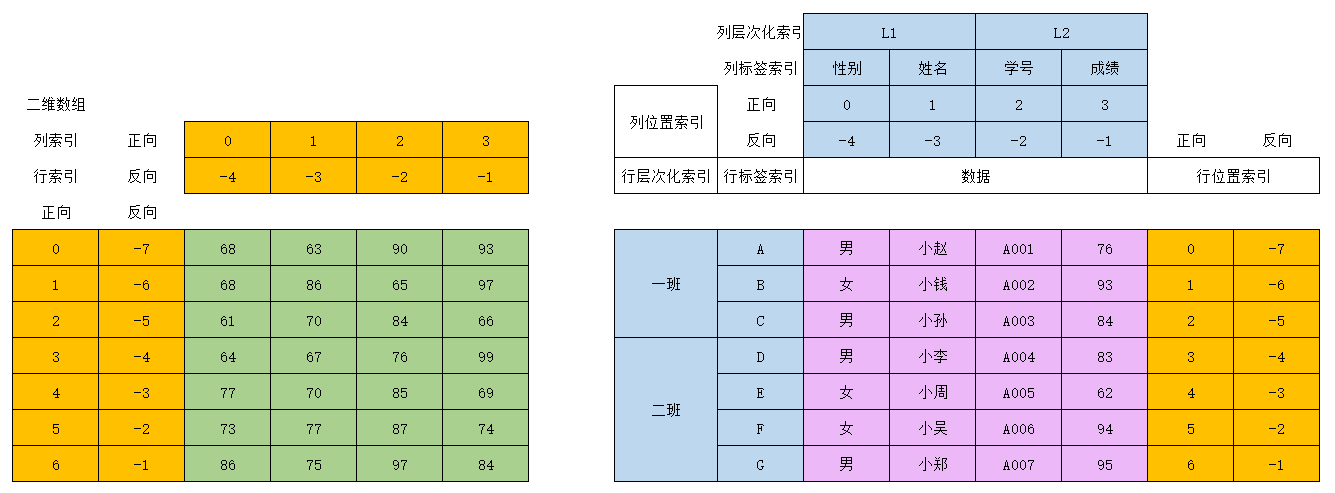

利用嵌套的容器在index/columns上创建带有层次化索引的对象

In [63]:
df_a = pd.DataFrame(
    np.random.randint(10, 21, (4,5)),
    index = [
        ['one','one','two','two'],['a','b','c','d']
    ],
    columns = [1,2,3,4,5]
)

In [64]:
df_a

1   2   3   4   5
one a  18  16  10  18  11
    b  13  19  10  17  12
two c  15  20  18  16  19
    d  11  12  11  13  12

In [65]:
df_a.index

MultiIndex([('one', 'a'),
            ('one', 'b'),
            ('two', 'c'),
            ('two', 'd')],
           )

In [66]:
df_b = pd.DataFrame(
    np.random.randint(10, 21, (4,5)),
    index = [
        ['one','one','two','two'],['a','b','c','d']
    ],
    columns = [
        ['A','A','B','B','B'],[1,2,3,4,5]
    ]
)
# 嵌套的容器中，靠前的索引成为外层索引，靠后的索引成为内层索引

In [67]:
df_b

A       B        
        1   2   3   4   5
one a  16  14  20  20  11
    b  13  15  19  10  12
two c  11  10  10  10  15
    d  13  13  17  19  15

In [68]:
df_b.columns

MultiIndex([('A', 1),
            ('A', 2),
            ('B', 3),
            ('B', 4),
            ('B', 5)],
           )

In [69]:
df2

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [70]:
df2.index

Index(['A', 'B', 'C'], dtype='object')

In [71]:
df2.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

### 层次化索引对象的删除

In [72]:
df_b

A       B        
        1   2   3   4   5
one a  16  14  20  20  11
    b  13  15  19  10  12
two c  11  10  10  10  15
    d  13  13  17  19  15

In [73]:
# 删除one对应的行
df_b.drop(index = 'one')
# 默认情况下，level = 0，代表最外层的索引

A       B        
        1   2   3   4   5
two c  11  10  10  10  15
    d  13  13  17  19  15

In [74]:
# df_b.drop(index = 'a')
# 报错，a不在最外层索引上

In [75]:
df_b.drop(index = 'two', level = 0)

A       B        
        1   2   3   4   5
one a  16  14  20  20  11
    b  13  15  19  10  12

In [76]:
df_b.drop(index = 'a', level = 1)

A       B        
        1   2   3   4   5
one b  13  15  19  10  12
two c  11  10  10  10  15
    d  13  13  17  19  15

In [77]:
# 删除2,5两列
df_b.drop(columns = [2,5], level = 1)

A   B    
        1   3   4
one a  16  20  20
    b  13  19  10
two c  11  10  10
    d  13  17  19

In [78]:
# 同时删除行和列
df_b.drop(index = 'one', columns = 'B', level = 0)

A    
        1   2
two c  11  10
    d  13  13

In [79]:
# df_b.drop(index = 'one', columns = [1,4], level = [0,1])
# 同时删除行和列时 ，要注意删除的索引必须在同一层level上，否则会报错

## 2.4 Index对象的创建

    除了使用Series和DataFrame的构造函数创建Index对象之外，也可以使用pd.Index方法创建Index对象
    
    pd.Index(
        data=None,          # 索引中的数据，一维的数据结构
        dtype=None,
        copy=False,
        name=None,          # 索引的名称
        tupleize_cols=True,
        **kwargs,
    ) -> 'Index'

In [80]:
# 在创建DataFrame的同时创建Index对象
df_c = pd.DataFrame(
    np.random.randint(10,51, (3,6)),
    index = pd.Index(
        data = ('人参', '黄芪', '当归'),
        name = '药材'
    ),
    columns = [
        ['A'] * 3 + ['B'] * 3, [1,2,3,1,2,3]
    ]
)

In [81]:
df_c

A           B        
     1   2   3   1   2   3
药材                        
人参  15  22  17  45  37  49
黄芪  20  24  40  50  25  31
当归  19  17  27  30  48  19

In [82]:
df_c.index

Index(['人参', '黄芪', '当归'], dtype='object', name='药材')

In [83]:
df_b

A       B        
        1   2   3   4   5
one a  16  14  20  20  11
    b  13  15  19  10  12
two c  11  10  10  10  15
    d  13  13  17  19  15

In [84]:
df_b.index

MultiIndex([('one', 'a'),
            ('one', 'b'),
            ('two', 'c'),
            ('two', 'd')],
           )

In [85]:
df1

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,18.3,19.0,10.3,12.6,16.3
2022-11-21,16.3,16.5,15.7,15.1,16.5
2022-11-22,10.9,17.5,19.2,15.9,11.6
2022-11-23,19.5,15.4,15.5,11.6,10.1
2022-11-24,11.2,11.2,12.1,9.0,16.8
2022-11-25,12.3,14.9,9.2,10.7,14.5
2022-11-26,9.1,15.7,16.9,9.5,14.2


In [86]:
df1.index

DatetimeIndex(['2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25', '2022-11-26'],
              dtype='datetime64[ns]', freq='D')

In [87]:
df_c.columns

MultiIndex([('A', 1),
            ('A', 2),
            ('A', 3),
            ('B', 1),
            ('B', 2),
            ('B', 3)],
           )

In [88]:
df_c.columns.name = '仓库'

In [89]:
df_c.columns

MultiIndex([('A', 1),
            ('A', 2),
            ('A', 3),
            ('B', 1),
            ('B', 2),
            ('B', 3)],
           name='仓库')

In [90]:
df_c

A           B        
     1   2   3   1   2   3
药材                        
人参  15  22  17  45  37  49
黄芪  20  24  40  50  25  31
当归  19  17  27  30  48  19

In [91]:
df5

,编号,编号2,广州,上海,北京,编号
2019,100,0,100000,200000.0,NaN,1
2020,200,1,120000,230000.0,250000.0,2
2021,300,2,150000,NaN,270000.0,3


In [92]:
df5.columns.name = '城市'

In [93]:
df5

城市,编号,编号2,广州,上海,北京,编号
2019,100,0,100000,200000.0,NaN,1
2020,200,1,120000,230000.0,250000.0,2
2021,300,2,150000,NaN,270000.0,3


In [94]:
# 层次化索引中，需要对每个层级进行命名
df_c.columns.names = ['库房', '编号']

In [95]:
df_c

库房   A           B        
编号   1   2   3   1   2   3
药材                        
人参  15  22  17  45  37  49
黄芪  20  24  40  50  25  31
当归  19  17  27  30  48  19

In [96]:
df_c.columns

MultiIndex([('A', 1),
            ('A', 2),
            ('A', 3),
            ('B', 1),
            ('B', 2),
            ('B', 3)],
           name='仓库')

当index或columns有name的时候，在drop时就可以使用level = 名称的方式来进行指定

In [97]:
df_c

库房   A           B        
编号   1   2   3   1   2   3
药材                        
人参  15  22  17  45  37  49
黄芪  20  24  40  50  25  31
当归  19  17  27  30  48  19

In [98]:
# 删除编号为3的库房
df_c.drop(columns = 3, level = 1)

库房   A       B    
编号   1   2   1   2
药材                
人参  15  22  45  37
黄芪  20  24  50  25
当归  19  17  30  48

In [99]:
df_c.drop(columns = 3, level = '编号')

库房   A       B    
编号   1   2   1   2
药材                
人参  15  22  45  37
黄芪  20  24  50  25
当归  19  17  30  48

In [155]:
df_c.to_excel('df_c.xlsx')
# 将DataFrame保存到excel文件中

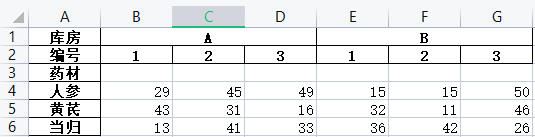

# 3.Pandas函数的运用与映射
常用的统计分析函数：
count/mean/median/mode/quantile/sum, min/max/std/var,describe/info

    直接使用：在数据集对象上直接调用函数
    Series.function()
    DataFrame.function()  # 注意axis的设置
    
    pd.DataFrame.max(
        self,
        axis: 'int | None | lib.NoDefault' = <no_default>,   # 起作用的方向
        skipna=True,                            # 是否跳过缺失值
        level=None,                             # 起作用的层级
        numeric_only=None,
        **kwargs,
    )
    
    间接调用（映射）：针对自定义函数
    function(Series/DataFrame) 这种操作是针对整个数据集对象
    为了能够将函数作用于数据集的单元上（行/列/值），需要使用apply
    Series.apply(function)
    DataFrame.apply(function)   # 要注意axis的设置

In [156]:
df1

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,18.3,19.0,10.3,12.6,16.3
2022-11-21,16.3,16.5,15.7,15.1,16.5
2022-11-22,10.9,17.5,19.2,15.9,11.6
2022-11-23,19.5,15.4,15.5,11.6,10.1
2022-11-24,11.2,11.2,12.1,9.0,16.8
2022-11-25,12.3,14.9,9.2,10.7,14.5
2022-11-26,9.1,15.7,16.9,9.5,14.2


In [157]:
df_stock = df1.copy()

In [158]:
df_stock.describe()

,Apple,Facebook,Microsoft,Google,Intel
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.942857,15.742857,14.128571,12.057143,14.285714
std,4.048809,2.440531,3.670020,2.653838,2.584201
min,9.100000,11.200000,9.200000,9.000000,10.100000
25%,11.050000,15.150000,11.200000,10.100000,12.900000
50%,12.300000,15.700000,15.500000,11.600000,14.500000
75%,17.300000,17.000000,16.300000,13.850000,16.400000
max,19.500000,19.000000,19.200000,15.900000,16.800000


In [159]:
df_stock.min()
# 默认的结果是在每列上求最小值，是针对行的计算（axis = 0）,返回的结果是Series

Apple         9.1
Facebook     11.2
Microsoft     9.2
Google        9.0
Intel        10.1
dtype: float64

In [160]:
# 每天的股票最高价
df_stock.max(axis = 1)
# 在行上求最大值，是针对列的计算

2022-11-20    19.0
2022-11-21    16.5
2022-11-22    19.2
2022-11-23    19.5
2022-11-24    16.8
2022-11-25    14.9
2022-11-26    16.9
Freq: D, dtype: float64

In [161]:
# 苹果股票的最大值
df_stock.Apple.max()
# 针对某列操作，返回的是单个值

19.5

In [162]:
df_stock.iloc[0].min()

10.3

In [163]:
df_stock

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,18.3,19.0,10.3,12.6,16.3
2022-11-21,16.3,16.5,15.7,15.1,16.5
2022-11-22,10.9,17.5,19.2,15.9,11.6
2022-11-23,19.5,15.4,15.5,11.6,10.1
2022-11-24,11.2,11.2,12.1,9.0,16.8
2022-11-25,12.3,14.9,9.2,10.7,14.5
2022-11-26,9.1,15.7,16.9,9.5,14.2


In [164]:
df_stock.iloc[0,0] = 17.4

In [165]:
df_stock

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,17.4,19.0,10.3,12.6,16.3
2022-11-21,16.3,16.5,15.7,15.1,16.5
2022-11-22,10.9,17.5,19.2,15.9,11.6
2022-11-23,19.5,15.4,15.5,11.6,10.1
2022-11-24,11.2,11.2,12.1,9.0,16.8
2022-11-25,12.3,14.9,9.2,10.7,14.5
2022-11-26,9.1,15.7,16.9,9.5,14.2


In [166]:
df_stock.Apple.mode()
# mode是求众数，返回的结果是Series

0     9.1
1    10.9
2    11.2
3    12.3
4    16.3
5    17.4
6    19.5
Name: Apple, dtype: float64

In [167]:
df_stock.Apple.mean()

13.814285714285713

In [168]:
df_stock.Apple.median()

12.3

In [169]:
type(df_stock.Apple.mode())

pandas.core.series.Series

In [170]:
df_stock.Apple.mode()[0]

9.1

## apply映射
使用apply进行间接调用（主要针对自定义函数）

    pd.DataFrame.apply(
        self,
        func: 'AggFuncType',    # 要调用的函数对象，注意不要加()
        axis: 'Axis' = 0,      # 函数执行的方向
        raw: 'bool' = False,
        result_type=None,
        args=(),            # 以简单调用方式传递给函数的参数
        **kwargs,           # 以关键字调用方式传递给函数的参数
    )

In [171]:
df_stock.max()

Apple        19.5
Facebook     19.0
Microsoft    19.2
Google       15.9
Intel        16.8
dtype: float64

In [172]:
df_stock.apply(max, axis = 0)

Apple        19.5
Facebook     19.0
Microsoft    19.2
Google       15.9
Intel        16.8
dtype: float64

在DataFrame中增加一列，用来存储当天价格最高的股票和价格最低的股票之间的差异

In [173]:
df_s1 = df_stock.copy()

In [174]:
df_stock.max(axis = 1)

2022-11-20    19.0
2022-11-21    16.5
2022-11-22    19.2
2022-11-23    19.5
2022-11-24    16.8
2022-11-25    14.9
2022-11-26    16.9
Freq: D, dtype: float64

In [175]:
df_stock.min(axis = 1)

2022-11-20    10.3
2022-11-21    15.1
2022-11-22    10.9
2022-11-23    10.1
2022-11-24     9.0
2022-11-25     9.2
2022-11-26     9.1
Freq: D, dtype: float64

In [176]:
df_stock.max(axis = 1) - df_stock.min(axis = 1)
# 结果是Series

2022-11-20    8.7
2022-11-21    1.4
2022-11-22    8.3
2022-11-23    9.4
2022-11-24    7.8
2022-11-25    5.7
2022-11-26    7.8
Freq: D, dtype: float64

In [177]:
df_stock['diff'] = df_stock.max(axis = 1) - df_stock.min(axis = 1)

In [178]:
df_stock

,Apple,Facebook,Microsoft,Google,Intel,diff
2022-11-20,17.4,19.0,10.3,12.6,16.3,8.7
2022-11-21,16.3,16.5,15.7,15.1,16.5,1.4
2022-11-22,10.9,17.5,19.2,15.9,11.6,8.3
2022-11-23,19.5,15.4,15.5,11.6,10.1,9.4
2022-11-24,11.2,11.2,12.1,9.0,16.8,7.8
2022-11-25,12.3,14.9,9.2,10.7,14.5,5.7
2022-11-26,9.1,15.7,16.9,9.5,14.2,7.8


In [179]:
# 换成apply实现
def diff(x):
    return x.max() - x.min()
# x是行还是列需要用axis确定

In [180]:
df_s1

,Apple,Facebook,Microsoft,Google,Intel
2022-11-20,17.4,19.0,10.3,12.6,16.3
2022-11-21,16.3,16.5,15.7,15.1,16.5
2022-11-22,10.9,17.5,19.2,15.9,11.6
2022-11-23,19.5,15.4,15.5,11.6,10.1
2022-11-24,11.2,11.2,12.1,9.0,16.8
2022-11-25,12.3,14.9,9.2,10.7,14.5
2022-11-26,9.1,15.7,16.9,9.5,14.2


In [181]:
diff(df_s1)

Apple        10.4
Facebook      7.8
Microsoft    10.0
Google        6.9
Intel         6.7
dtype: float64

In [182]:
df_s1.apply(diff)
# 默认情况下，axis = 0，得到的结果呈现在列上

Apple        10.4
Facebook      7.8
Microsoft    10.0
Google        6.9
Intel         6.7
dtype: float64

In [183]:
df_s1.apply(diff, axis = 1)

2022-11-20    8.7
2022-11-21    1.4
2022-11-22    8.3
2022-11-23    9.4
2022-11-24    7.8
2022-11-25    5.7
2022-11-26    7.8
Freq: D, dtype: float64

In [184]:
df_s1['diff'] = df_s1.apply(diff, axis = 1)

In [185]:
df_s1

,Apple,Facebook,Microsoft,Google,Intel,diff
2022-11-20,17.4,19.0,10.3,12.6,16.3,8.7
2022-11-21,16.3,16.5,15.7,15.1,16.5,1.4
2022-11-22,10.9,17.5,19.2,15.9,11.6,8.3
2022-11-23,19.5,15.4,15.5,11.6,10.1,9.4
2022-11-24,11.2,11.2,12.1,9.0,16.8,7.8
2022-11-25,12.3,14.9,9.2,10.7,14.5,5.7
2022-11-26,9.1,15.7,16.9,9.5,14.2,7.8


In [186]:
df_s1['Bei'] = df_s1.apply(lambda x:x.max() / x.min(), axis = 1)

In [187]:
df_s1

,Apple,Facebook,Microsoft,Google,Intel,diff,Bei
2022-11-20,17.4,19.0,10.3,12.6,16.3,8.7,2.183908
2022-11-21,16.3,16.5,15.7,15.1,16.5,1.4,11.785714
2022-11-22,10.9,17.5,19.2,15.9,11.6,8.3,2.313253
2022-11-23,19.5,15.4,15.5,11.6,10.1,9.4,2.074468
2022-11-24,11.2,11.2,12.1,9.0,16.8,7.8,2.153846
2022-11-25,12.3,14.9,9.2,10.7,14.5,5.7,2.614035
2022-11-26,9.1,15.7,16.9,9.5,14.2,7.8,2.166667


In [188]:
df_stock

,Apple,Facebook,Microsoft,Google,Intel,diff
2022-11-20,17.4,19.0,10.3,12.6,16.3,8.7
2022-11-21,16.3,16.5,15.7,15.1,16.5,1.4
2022-11-22,10.9,17.5,19.2,15.9,11.6,8.3
2022-11-23,19.5,15.4,15.5,11.6,10.1,9.4
2022-11-24,11.2,11.2,12.1,9.0,16.8,7.8
2022-11-25,12.3,14.9,9.2,10.7,14.5,5.7
2022-11-26,9.1,15.7,16.9,9.5,14.2,7.8


# 4.数据集的合并

    字段的合并：merge
    记录的合并：concat

In [189]:
# 构建用来进行合并的数据集
dfa = pd.DataFrame(
    {
        '学号':['#001', '#002', '#003'],
        '数学':np.random.randint(60,101,3),
        '语文':np.random.randint(60,101,3),
        '英语':np.random.randint(60,101,3)
    },
    index = [1, 5, 4]
)

In [190]:
dfa

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64


In [191]:
# 构建用来进行合并的另一个数据集
dfb = pd.DataFrame(
    {
        '学号':['#001', '#002', '#003'],
        '体育':np.random.randint(60,91,3)
    }
)

In [192]:
dfb

,学号,体育
0,#001,84
1,#002,89
2,#003,75


## 4.1 字段的合并 merge

    pd.merge(
        left: 'DataFrame | Series',         # 左表
        right: 'DataFrame | Series',         # 右表
        how: 'str' = 'inner',             # 连接方式（合并方式），常用的有左右内外
        on: 'IndexLabel | None' = None,       # 合并用的键字段（两个表中都有的字段）
        left_on: 'IndexLabel | None' = None,   # 左表的键字段（左右表的键字段不同时使用）
        right_on: 'IndexLabel | None' = None,   # 右表的键字段 
        left_index: 'bool' = False,          # 使用索引进行合并时，设置为True
        right_index: 'bool' = False,         # 使用索引进行合并时，设置为True
        sort: 'bool' = False,
        suffixes: 'Suffixes' = ('_x', '_y'),
        copy: 'bool' = True,
        indicator: 'bool' = False,
        validate: 'str | None' = None,
    ) -> 'DataFrame'
    # 返回合并之后的数据集

In [193]:
dfa,dfb

(     学号  数学  语文  英语
 1  #001  95  75  78
 5  #002  84  87  68
 4  #003  72  91  64,
      学号  体育
 0  #001  84
 1  #002  89
 2  #003  75)

In [194]:
dfa

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64


In [195]:
dfb

,学号,体育
0,#001,84
1,#002,89
2,#003,75


### 最理想的情况：左右正好匹配

In [196]:
df_m1 = pd.merge(left = dfa, right=dfb)
# 默认情况下，会使用两张表中都有的字段（列名称）作为键字段进行inner join
# 该操作会重置索引

In [197]:
df_m1

,学号,数学,语文,英语,体育
0,#001,95,75,78,84
1,#002,84,87,68,89
2,#003,72,91,64,75


In [198]:
# 构建一个新的数据集
dfc = pd.DataFrame(
    {
        '学号':['#001', '#002', '#004'],
        '体育':np.random.randint(60,91,3)
    }
)

In [199]:
dfc

,学号,体育
0,#001,89
1,#002,78
2,#004,67


In [200]:
dfa

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64


In [201]:
df_m2 = pd.merge(dfa, dfc, on = '学号', how = 'inner')
# 以学号作为键字段进行inner join
# 交集：两个数据集中都有的数据进入到结果

In [202]:
df_m2

,学号,数学,语文,英语,体育
0,#001,95,75,78,89
1,#002,84,87,68,78


### 除了inner join的连接方式 left/right/full

In [203]:
df_m3  = pd.merge(dfa, dfc, on = '学号', how = 'left')
df_m3
# 左连接
# 两个数据集中学号能匹配的记录和左表所有的记录
# 不匹配的位置引入nan

,学号,数学,语文,英语,体育
0,#001,95,75,78,89.0
1,#002,84,87,68,78.0
2,#003,72,91,64,NaN


In [204]:
df_m4  = pd.merge(dfa, dfc, on = '学号', how = 'right')
df_m4
# 右连接
# 两个数据集中学号能匹配的记录和右表所有的记录
# 不匹配的位置引入nan

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89
1,#002,84.0,87.0,68.0,78
2,#004,NaN,NaN,NaN,67


In [205]:
df_m5  = pd.merge(dfa, dfc, on = '学号', how = 'outer')
df_m5
# 全连接 outer full join
# 两个数据集中所有的记录，并集
# 不匹配的位置引入nan

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,NaN
3,#004,NaN,NaN,NaN,67.0


## 4.2 记录的合并concat

    pd.concat(
        objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',   # 合并用的数据集，注意要放在容器中
        axis: 'Axis' = 0,
        join: 'str' = 'outer',
        ignore_index: 'bool' = False,
        keys=None,
        levels=None,
        names=None,
        verify_integrity: 'bool' = False,
        sort: 'bool' = False,
        copy: 'bool' = True,
    ) -> 'DataFrame | Series'

In [206]:
dfa

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64


In [207]:
# 构建用来进行合并的数据集
dfd = pd.DataFrame(
    {
        '学号':['#004', '#006', '#005'],
        '数学':np.random.randint(60,101,3),
        '语文':np.random.randint(60,101,3),
        '英语':np.random.randint(60,101,3)
    }
)

In [208]:
dfd

,学号,数学,语文,英语
0,#004,67,82,98
1,#006,69,66,100
2,#005,83,84,87


In [209]:
df_m6 = pd.concat((dfa, dfd))
# concat不会重置索引，结果中可能会出现索引不连续或重复的情况，需要手动处理

In [210]:
df_m6

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64
0,#004,67,82,98
1,#006,69,66,100
2,#005,83,84,87


In [211]:
df_m6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   学号      6 non-null      object
 1   数学      6 non-null      int32 
 2   语文      6 non-null      int32 
 3   英语      6 non-null      int32 
dtypes: int32(3), object(1)
memory usage: 168.0+ bytes


### 重置索引 reset_index

    pd.DataFrame.reset_index(
        self,
        level: 'Hashable | Sequence[Hashable] | None' = None,   # 起作用的层级
        drop: 'bool' = False,                        # 是否删除重置索引时生成的索引列（存储的是原来的索引）
        inplace: 'bool' = False,                       # 是否进行本地修改
        col_level: 'Hashable' = 0,
        col_fill: 'Hashable' = '',
    ) -> 'DataFrame | None'

In [212]:
df_m6.reset_index()

,index,学号,数学,语文,英语
0,1,#001,95,75,78
1,5,#002,84,87,68
2,4,#003,72,91,64
3,0,#004,67,82,98
4,1,#006,69,66,100
5,2,#005,83,84,87


In [213]:
df_m6

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64
0,#004,67,82,98
1,#006,69,66,100
2,#005,83,84,87


In [214]:
df_m6.reset_index(drop = True)

,学号,数学,语文,英语
0,#001,95,75,78
1,#002,84,87,68
2,#003,72,91,64
3,#004,67,82,98
4,#006,69,66,100
5,#005,83,84,87


In [215]:
df_m6

,学号,数学,语文,英语
1,#001,95,75,78
5,#002,84,87,68
4,#003,72,91,64
0,#004,67,82,98
1,#006,69,66,100
2,#005,83,84,87


In [216]:
df_r = df_m6.reset_index(drop = True)

In [217]:
df_r

,学号,数学,语文,英语
0,#001,95,75,78
1,#002,84,87,68
2,#003,72,91,64
3,#004,67,82,98
4,#006,69,66,100
5,#005,83,84,87


In [218]:
df_m6.reset_index(drop = True, inplace = True)

In [219]:
df_m6

,学号,数学,语文,英语
0,#001,95,75,78
1,#002,84,87,68
2,#003,72,91,64
3,#004,67,82,98
4,#006,69,66,100
5,#005,83,84,87


# 5.数据清洗
## 5.1 缺失值的处理：删除、填补
### 找出数据集中的缺失

In [220]:
df_m5

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,NaN
3,#004,NaN,NaN,NaN,67.0


In [221]:
df_m5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学号      4 non-null      object 
 1   数学      3 non-null      float64
 2   语文      3 non-null      float64
 3   英语      3 non-null      float64
 4   体育      3 non-null      float64
dtypes: float64(4), object(1)
memory usage: 292.0+ bytes


    isnull / notnull
    返回布尔型的数据集，可以通过True /False的位置了解具体的缺失情况

In [222]:
df_m5.isnull()
# 缺失位置以True显示

,学号,数学,语文,英语,体育
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True
3,False,True,True,True,False


In [223]:
df_m5.notnull()
# 缺失位置以False显示

,学号,数学,语文,英语,体育
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,False
3,True,False,False,False,True


isnull/notnull只适用于比较小的数据集

In [224]:
long_df = pd.DataFrame(
    np.random.randint(80, 200, (1000, 5)),
    index = pd.date_range('2022/01/01', periods=1000),
    columns = ['A','B','C','D','E']
)

In [225]:
long_df

,A,B,C,D,E
2022-01-01,125,185,181,88,142
2022-01-02,143,181,190,146,84
2022-01-03,165,121,189,93,195
2022-01-04,155,129,185,183,142
2022-01-05,196,189,195,128,80
...,...,...,...,...,...
2024-09-22,121,156,130,133,194
2024-09-23,192,182,162,170,190
2024-09-24,103,104,146,164,82
2024-09-25,92,128,89,115,163


In [226]:
long_df.isnull()

,A,B,C,D,E
2022-01-01,False,False,False,False,False
2022-01-02,False,False,False,False,False
2022-01-03,False,False,False,False,False
2022-01-04,False,False,False,False,False
2022-01-05,False,False,False,False,False
...,...,...,...,...,...
2024-09-22,False,False,False,False,False
2024-09-23,False,False,False,False,False
2024-09-24,False,False,False,False,False
2024-09-25,False,False,False,False,False


In [227]:
df_m5.isnull().any()
# 按照列的级别进行缺失情况的返回，如果某列中存在缺失，就以True显示

学号    False
数学     True
语文     True
英语     True
体育     True
dtype: bool

In [228]:
df_m5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学号      4 non-null      object 
 1   数学      3 non-null      float64
 2   语文      3 non-null      float64
 3   英语      3 non-null      float64
 4   体育      3 non-null      float64
dtypes: float64(4), object(1)
memory usage: 292.0+ bytes


In [229]:
df_m5.isnull().sum() # 求和
# True == 1 ,False == 0
# 每列中的具体缺失情况

学号    0
数学    1
语文    1
英语    1
体育    1
dtype: int64

In [230]:
df_m5.isnull().sum().sort_values(ascending=False)
# 会将缺失值越多的列放在越前面

数学    1
语文    1
英语    1
体育    1
学号    0
dtype: int64

In [231]:
df2

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [232]:
df3

,c,d,e
B,1,2,3
C,4,5,6
D,7,8,9
E,10,11,12


In [233]:
df_s = df2 + df3

In [234]:
df_s

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,7.0,9.0,NaN
C,NaN,NaN,14.0,16.0,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN


In [235]:
df_s.isnull().sum().sort_values(ascending=False)

a    5
b    5
e    5
c    3
d    3
dtype: int64

## 5.2 删除缺失值 dropna

    pd.DataFrame.dropna(
        self,
        axis: 'Axis' = 0,              # 删除的方向
        how: 'str' = 'any',
        thresh=None,
        subset: 'IndexLabel' = None,      # 删除的依据，可以是标签名称或列表
        inplace: 'bool' = False,
    )
    
    pd.Series.dropna(self, axis=0, inplace=False, how=None)
    # 在Series上进行删除不需要指定subset

In [236]:
df_m5

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,NaN
3,#004,NaN,NaN,NaN,67.0


In [237]:
df_m5.dropna()
# 默认情况下会删除所有带有缺失值的行，一般用在缺失值较少的情况下

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0


In [238]:
df_m5.dropna(axis = 1)
# 删除所有带有缺失值的列

,学号
0,#001
1,#002
2,#003
3,#004


In [239]:
# 删除体育成绩缺失的行
df_m5.dropna(subset = '体育')

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
3,#004,NaN,NaN,NaN,67.0


In [240]:
# 删除语文和数学成绩缺失的行
df_m5.dropna(subset = ['语文', '数学'])

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,NaN


In [241]:
df_m5.语文.dropna()
# 在Series上进行dropna，结果也是Series

0    75.0
1    87.0
2    91.0
Name: 语文, dtype: float64

## 5.3 填补缺失值 fillna

    pd.Series/DataFrame.fillna(
        self,
        value: 'object | ArrayLike | None' = None,   # 填补的内容
        method: 'FillnaOptions | None' = None,
        axis=None,
        inplace=False,                      # 是否进行本地修改
        limit=None,
        downcast=None,
    ) -> 'Series/DataFrame | None'

In [242]:
df_m5

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,NaN
3,#004,NaN,NaN,NaN,67.0


In [243]:
# 缺考的同学都记0分
df_m5.fillna(0)

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,0.0
3,#004,0.0,0.0,0.0,67.0


In [244]:
# 针对语文成绩用平均值进行填补
df_m5.语文

0    75.0
1    87.0
2    91.0
3     NaN
Name: 语文, dtype: float64

In [245]:
df_m5.语文.mean()

84.33333333333333

In [246]:
df_m5.语文.fillna(df_m5.语文.mean())

0    75.000000
1    87.000000
2    91.000000
3    84.333333
Name: 语文, dtype: float64

In [247]:
df_m5

,学号,数学,语文,英语,体育
0,#001,95.0,75.0,78.0,89.0
1,#002,84.0,87.0,68.0,78.0
2,#003,72.0,91.0,64.0,NaN
3,#004,NaN,NaN,NaN,67.0


In [248]:
df_m5['语文成绩填补'] = df_m5.语文.fillna(df_m5.语文.mean())

In [249]:
df_m5

,学号,数学,语文,英语,体育,语文成绩填补
0,#001,95.0,75.0,78.0,89.0,75.000000
1,#002,84.0,87.0,68.0,78.0,87.000000
2,#003,72.0,91.0,64.0,NaN,91.000000
3,#004,NaN,NaN,NaN,67.0,84.333333


In [250]:
df_m5.体育.fillna(df_m5.体育.mean(), inplace =True)

In [251]:
df_m5

,学号,数学,语文,英语,体育,语文成绩填补
0,#001,95.0,75.0,78.0,89.0,75.000000
1,#002,84.0,87.0,68.0,78.0,87.000000
2,#003,72.0,91.0,64.0,78.0,91.000000
3,#004,NaN,NaN,NaN,67.0,84.333333


fill_value和fillna的区别

In [252]:
df2 + df3

,a,b,c,d,e
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,7.0,9.0,NaN
C,NaN,NaN,14.0,16.0,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN


In [253]:
df2.add(df3, fill_value = 0)
# 先填充，再计算，针对一个数据集有，另一个数据集没有的位置进行填充，两个数据集都没有的位置仍然缺失

,a,b,c,d,e
A,0.0,1.0,2.0,3.0,NaN
B,4.0,5.0,7.0,9.0,3.0
C,8.0,9.0,14.0,16.0,6.0
D,NaN,NaN,7.0,8.0,9.0
E,NaN,NaN,10.0,11.0,12.0


In [254]:
df2.add(df3).fillna(0)
# 先计算，再填充，将结果中所有的缺失值都填充为指定的值

,a,b,c,d,e
A,0.0,0.0,0.0,0.0,0.0
B,0.0,0.0,7.0,9.0,0.0
C,0.0,0.0,14.0,16.0,0.0
D,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0


In [255]:
df2.add(df3, fill_value =0).fillna(0)

,a,b,c,d,e
A,0.0,1.0,2.0,3.0,0.0
B,4.0,5.0,7.0,9.0,3.0
C,8.0,9.0,14.0,16.0,6.0
D,0.0,0.0,7.0,8.0,9.0
E,0.0,0.0,10.0,11.0,12.0


## 5.4 重复值的处理
### 标识重复值 duplicated

    pd.DataFrame.duplicated(
        self,
        subset: 'Hashable | Sequence[Hashable] | None' = None,
        # 以哪个列或哪些列作为判断重复的依据，默认是以所有列为重复依据
        keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first',
    ) -> 'Series'
    # 返回的结果是哪些行重复的布尔型的Series

In [256]:
# 构建一个包含重复数据的DataFrame
df_dup = pd.DataFrame(
    {
        'c1':['apple'] * 3 + ['banana'] * 3 + ['apple'],
        'c2':['a','a','b','b',3,4,'a']
    }
)

In [257]:
df_dup

,c1,c2
0,apple,a
1,apple,a
2,apple,b
3,banana,b
4,banana,3
5,banana,4
6,apple,a


In [258]:
df_dup.duplicated()
# 返回一个布尔型的Series，重复的行以True显示
# 所有的列都重复，才认定为重复数据

0    False
1     True
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [259]:
df_dup.duplicated(subset = ['c1'])
# 以c1列作为判断重复的依据

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [260]:
# 筛选出不重复的数据
df_dup[df_dup.duplicated()]
# 布尔索引，以布尔值的True进行筛选，返回的结果是重复数据

,c1,c2
1,apple,a
6,apple,a


In [261]:
# 筛选出不重复的数据
df_dup[~df_dup.duplicated()]

,c1,c2
0,apple,a
2,apple,b
3,banana,b
4,banana,3
5,banana,4


### 删除重复数据 drop_duplicates

    pd.DataFrame.drop_duplicates(
        self,
        subset: 'Hashable | Sequence[Hashable] | None' = None,
        # 删除重复数据的依据
        keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first',
        inplace: 'bool' = False,
        #是否本地修改
        ignore_index: 'bool' = False,
    ) -> 'DataFrame | None'

In [262]:
df_dup.drop_duplicates()

,c1,c2
0,apple,a
2,apple,b
3,banana,b
4,banana,3
5,banana,4


In [263]:
df_dup.drop_duplicates(subset = 'c1')

,c1,c2
0,apple,a
3,banana,b


In [264]:
# 附加：载入kscj.csv